In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

/Users/sergiynokhrin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
MichelinNY = pd.read_csv("MichelinNY.csv", encoding='latin-1')

In [3]:
MichelinNY.head(5)

,InMichelin,Restaurant Name,Food,Decor,Service,Price
0,0,14 Wall Street,19,20,19,50
1,0,212,17,17,16,43
2,0,26 Seats,23,17,21,35
3,1,44,19,23,16,52
4,0,A,23,12,19,24


In [4]:
MichelinNY.sort_values('Food')


,InMichelin,Restaurant Name,Food,Decor,Service,Price
142,0,Pershing Square,15,16,15,38
33,0,Cafe Un Deux Trois,16,15,16,40
1,0,212,17,17,16,43
27,0,Brasserie Julien,17,19,17,41
22,0,Bistro Le Steak,17,14,17,41
87,0,La Belle Vie,17,17,17,34
86,0,L'Express,17,15,13,28
17,0,BED New York,17,24,17,52
146,0,Pigalle,17,17,16,34
110,0,Le Monde,17,18,14,30


In [5]:
MichelinNY.describe()

,InMichelin,Food,Decor,Service,Price
count,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.451220,21.243902,19.164634,19.701220,50.097561
std,0.499139,2.776152,3.792594,3.263819,22.129352
min,0.000000,15.000000,12.000000,13.000000,13.000000
25%,0.000000,19.000000,16.000000,17.000000,39.000000
50%,0.000000,21.000000,19.000000,19.000000,45.000000
75%,1.000000,23.000000,22.000000,21.250000,53.000000
max,1.000000,28.000000,28.000000,28.000000,201.000000


In [6]:
MichelinGroupByFood = MichelinNY[['Food', 'InMichelin']].groupby(['Food']).agg({'InMichelin': 'sum', 'Food': 'count'})

In [7]:
MichelinGroupByFood.columns = ['InMichelin', 'Count']

In [8]:
MichelinGroupByFood.InMichelin / MichelinGroupByFood.Count

Food
15    0.000000
16    0.000000
17    0.000000
18    0.133333
19    0.277778
20    0.242424
21    0.576923
22    0.333333
23    0.666667
24    0.857143
25    0.916667
26    0.500000
27    0.857143
28    1.000000
dtype: float64

In [10]:
MichelinGroupByFood['Proportion'] = MichelinGroupByFood.InMichelin / MichelinGroupByFood.Count

In [11]:
MichelinGroupByFood['NotInMichelin']= MichelinGroupByFood.Count - MichelinGroupByFood.InMichelin
MichelinGroupByFood

,InMichelin,Count,Proportion,NotInMichelin
Food,,,,
15,0,1,0.000000,1
16,0,1,0.000000,1
17,0,8,0.000000,8
18,2,15,0.133333,13
19,5,18,0.277778,13
20,8,33,0.242424,25
21,15,26,0.576923,11
22,4,12,0.333333,8
23,12,18,0.666667,6


In [13]:
Michelin_count = MichelinGroupByFood.reset_index()
Michelin_count

,Food,InMichelin,Count,Proportion,NotInMichelin
0,15,0,1,0.000000,1
1,16,0,1,0.000000,1
2,17,0,8,0.000000,8
3,18,2,15,0.133333,13
4,19,5,18,0.277778,13
5,20,8,33,0.242424,25
6,21,15,26,0.576923,11
7,22,4,12,0.333333,8
8,23,12,18,0.666667,6
9,24,6,7,0.857143,1


In [14]:
Michelin_count = Michelin_count[['Food','InMichelin', 'NotInMichelin', 'Count', 'Proportion']]

In [15]:
Michelin_count

,Food,InMichelin,NotInMichelin,Count,Proportion
0,15,0,1,1,0.000000
1,16,0,1,1,0.000000
2,17,0,8,8,0.000000
3,18,2,13,15,0.133333
4,19,5,13,18,0.277778
5,20,8,25,33,0.242424
6,21,15,11,26,0.576923
7,22,4,8,12,0.333333
8,23,12,6,18,0.666667
9,24,6,1,7,0.857143


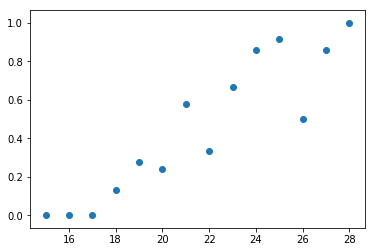

In [16]:
plt.scatter(Michelin_count.Food, Michelin_count.Proportion)
plt.show()

In [17]:
result = sm.formula.glm(formula ='InMichelin + NotInMichelin ~ Food', family=sm.families.Binomial(), data=Michelin_count).fit()

In [18]:
Predicted_prob=result.predict(Michelin_count.Food)

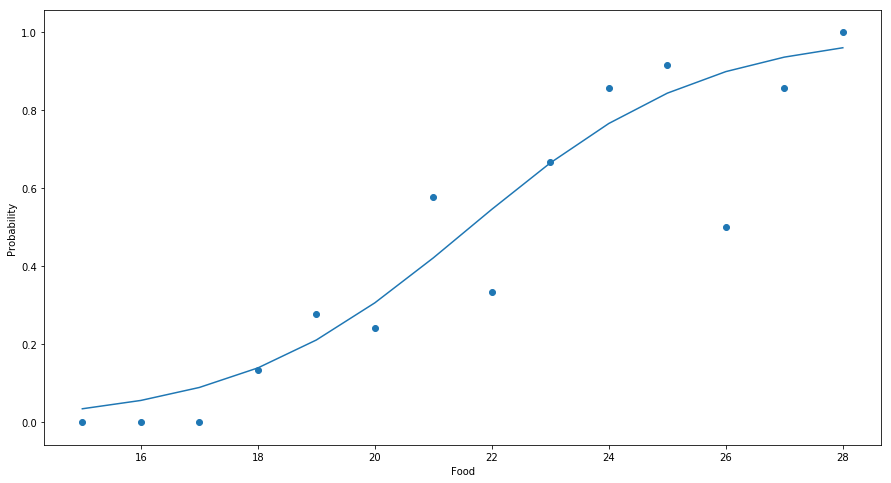

In [19]:
plt.figure(figsize=(15,8))
plt.scatter(Michelin_count.Food, Michelin_count.Proportion)
plt.plot(Michelin_count.Food, Predicted_prob)
plt.xlabel('Food')
plt.ylabel('Probability')
plt.show()

In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Generalized Linear Model Regression Results                        
===========================================================================================
Dep. Variable:     ['InMichelin', 'NotInMichelin']   No. Observations:                   14
Model:                                         GLM   Df Residuals:                       12
Model Family:                             Binomial   Df Model:                            1
Link Function:                               logit   Scale:                             1.0
Method:                                       IRLS   Log-Likelihood:                -18.746
Date:                             Mon, 09 Jul 2018   Deviance:                       11.368
Time:                                     21:17:23   Pearson chi2:                     2.52
No. Iterations:                                  5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8415      1.862     -5.821      0.000     -14.492      -7.191
Food           0.5012      0.088      5.717      0.000       0.329       0.673
==============================================================================
"""

In [34]:
result.deviance

11.368430211997177

In [35]:
from sklearn.linear_model import LogisticRegression 

In [36]:
X = MichelinNY['Food'].values.reshape(-1, 1)
Y = MichelinNY['InMichelin'].values
Y.size
X.size

164

In [37]:
michelin_log_reg = LogisticRegression(C=1e0)
michelin_log_reg.fit(X, Y,)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
X_Food = np.linspace(12, 31, 1000).reshape(-1, 1)
Learn_Probability = michelin_log_reg.predict_proba(X_Food)

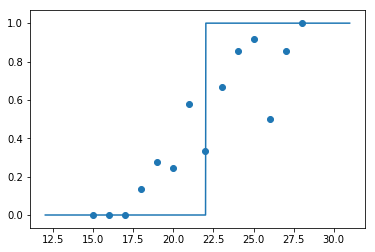

In [39]:
Probability = michelin_log_reg.predict(X_Food)
plt.plot(X_Food, Probability)
plt.scatter(Michelin_count.Food, Michelin_count.Proportion)
plt.show()

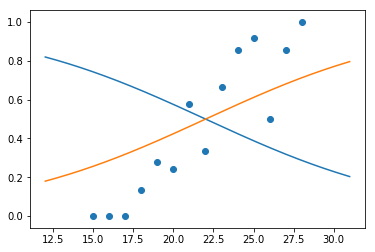

In [40]:
plt.plot(X_Food, Learn_Probability)
plt.scatter(Michelin_count.Food, Michelin_count.Proportion)
plt.show()